# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [46]:
def read_img(img_path):
    return cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)


def show_images(original_img, filtered_img):
    f, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    ax[0].imshow(original_img)
    ax[1].imshow(filtered_img)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].set_title('Original image')
    ax[1].set_title('Filtered image')
    plt.show()


lena_rgb = read_img('lenaRGB.png')
lena_noise_rgb = read_img('lenaRGBSzum.png')


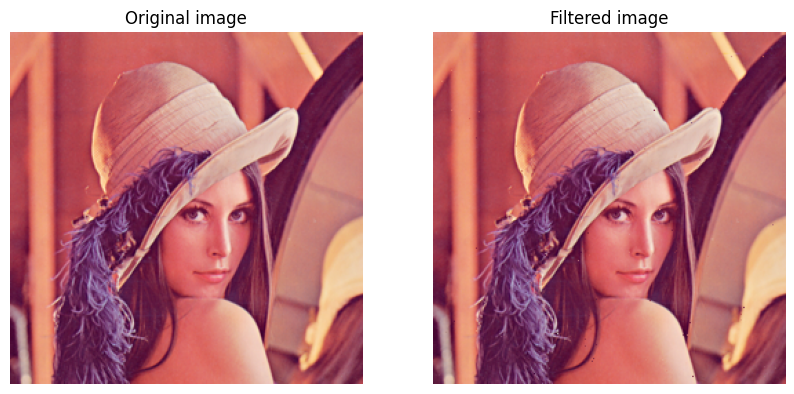

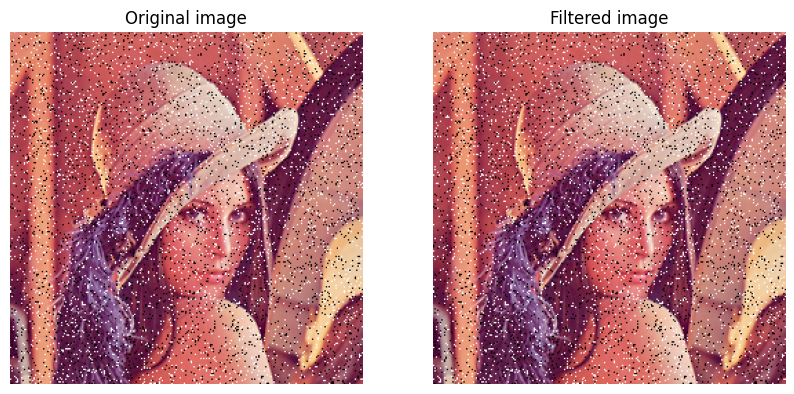

In [48]:
def median_filter_color_center(image, window_size):
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    pad_size = window_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='reflect')
    filtered_image = np.zeros_like(image)

    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            window = padded_image[row:row + window_size, col:col + window_size, :]
            center_pixel = window[window_size // 2, window_size // 2, :]

            
            diff = window - center_pixel
   
            distances = np.sqrt(np.sum(np.square(diff), axis=-1))

       
            min_idx = np.argmin(distances)
            min_coords = np.unravel_index(min_idx, (window_size, window_size))

          
            filtered_image[row, col, :] = window[min_coords[0], min_coords[1], :]

    return filtered_image


filtered_lena = median_filter_color_center(lena_rgb, 7)
filtered_noise_lena = median_filter_color_center(lena_noise_rgb, 7)

show_images(lena_rgb, filtered_lena)
show_images(lena_noise_rgb, filtered_noise_lena)
